In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size and parameters
nx, ny = 50, 50  # Grid points in x and y directions
dx, dy = 1.0, 1.0  # Grid spacing

In [84]:
# Define charge distribution (source term ρ)
rhow = np.zeros((nx, ny))
rhow[nx//2, ny//2] = -1.0  # Point charge at the center

# Initialize potential field ϕ with zero
fi = np.zeros((nx, ny))

In [86]:
# Set boundary conditions (Dirichlet: pi = 0 at the edges)
fi[:, 0] = 0  # Left boundary
fi[:, -1] = 0  # Right boundary
fi[0, :] = 0  # Bottom boundary
fi[-1, :] = 0  # Top boundary


In [88]:
# Iterative solution using Gauss-Seidel method
tolerance = 1e-5  # Convergence criteria
max_iter = 5000  # Maximum iterations

for it in range(max_iter):
    old_fi = fi.copy()

In [90]:
# Update interior points using finite difference
for i in range(1, nx - 1):
    for j in range(1, ny - 1):
         fi[i, j] = 0.25 * (fi[i+1, j] + fi[i-1, j] + fi[i, j+1] + fi[i, j-1] - dx**2 * rhow[i, j])

    # Check for convergence
    if np.max(np.abs(fi - old_fi)) < tolerance:
        print(f"Converged after {it} iterations.")
        break

Converged after 4999 iterations.


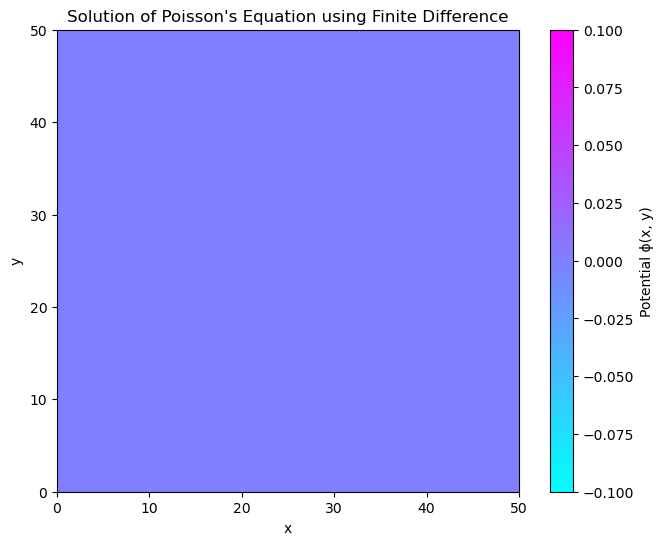

In [92]:
# Plot the potential distribution
plt.figure(figsize=(8, 6))
plt.imshow(fi, extent=[0, nx, 0, ny], origin='lower', cmap='cool')
plt.colorbar(label="Potential ϕ(x, y)")
plt.title("Solution of Poisson's Equation using Finite Difference")
plt.xlabel("x")
plt.ylabel("y")
plt.show()